In [0]:
from keras.datasets import imdb
# keras에 내장된 데이터 imdb를 불러온다.
# imdb 는 영화평가에 대한 데이터이다. 영화에 대한 감상문이 단어별로 쪼개져 있고 그 영화가 긍정적이었는지 부정적이었는지 명시되어있다.
# # label에서 1은 긍정(positive) 0은 부정(negative)를 뜻한다.

Using TensorFlow backend.


In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
# 여기서 num_words = 10000은 단어를 최빈순으로 정렬했을 때 10000번째 순위까지만 고려하겠다는 의미이다.

In [0]:
import numpy as np
# numpy 배열을 사용하기 위해 np로 불러들였다.

In [0]:
def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results
# 훈련데이터의 배열이 원하는 모양이 아니므로 원하는 모양으로 만들어주는 함수 vectorize_sequences를 정의했다.

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
# 위에서 정의한 함수를 이용하여 데이터를 원하는 모양으로 만들었다.

In [0]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')
# lable 데이터도 원하는 모양으로 만들었다.

In [0]:
from keras import models
from keras import layers
# keras에 내장된 models과 layers를 불러들였다.

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrices = ['accuracy'])
# model 메소드를 이요하여 노드가 16개인 층 2개를 만들었고 마지막 결과는 시그모이드를 통과하도록 인공신경망을 구축하였다.
# 최적화 방법은 adam 을 사용하였다.

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
from keras import optimizers, losses, metrics

In [0]:
model.compile(optimizer = optimizers.Adam(lr=0.001), loss = losses.binary_crossentropy, metrics = [metrics.binary_accuracy])
# 인공신경망의 매개변수를 훈련시키기 위해 Adam 방법으로 최적화를 진행했다.

In [0]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))
# 매개변수가 튜닝된 인공신경망의 성능 평가를 위해 총 에폭 수를 20으로 설정했다. 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 161us/step - loss: 0.5612 - binary_accuracy: 0.7579 - val_loss: 0.4055 - val_binary_accuracy: 0.8556
Epoch 2/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.2999 - binary_accuracy: 0.9001 - val_loss: 0.2932 - val_binary_accuracy: 0.8877
Epoch 3/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1970 - binary_accuracy: 0.9336 - val_loss: 0.2769 - val_binary_accuracy: 0.8896
Epoch 4/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1429 - binary_accuracy: 0.9533 - val_loss: 0.2877 - val_binary_accuracy: 0.8868
Epoch 5/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1062 - binary_accuracy: 0.9694 - val_loss: 0.3051 - val_binary_accuracy: 0.8840
Epoch 6/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.0785 - binary_accuracy: 0.9806 - val_loss: 0.3305 - val_binary_

In [0]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

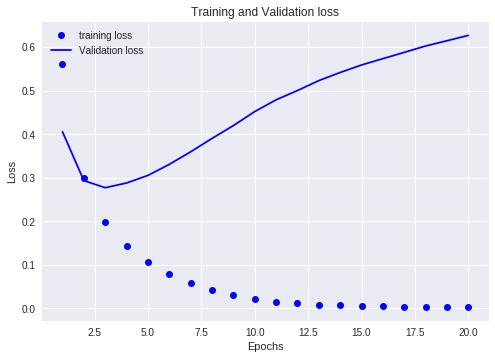

In [0]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show
# 실행결과를 그래프로 그려서 확인해보았다.
# 2.5 에폭까지 Validation loss 가 감소하다가 이후 증가하기 시작했다. 이는 인공신경망이 overfitting 되어간다는 것을 의미한다.
# 이러한 overfitting 현상을 방지하기 위해 정규화, 가중치감소, 드롭아웃 등의 기법이 필요하다는 것을 알게 되었다.
